In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize

from pandasai import SmartDataframe
from pandasai.llm.openai import OpenAI
from dotenv import load_dotenv
import os

from unicodedata import category

This EDA came from the Medium article: https://anelmusic13.medium.com/how-to-score-top-3-in-kaggles-titanic-machine-learning-from-disaster-competition-13d056e262b1

 # load data

In [5]:
DIR_DATASET = os.path.join(os.getcwd(), 'dataset')
DIR_SUBMISSIONS = os.path.join(os.getcwd(), 'submissions')

train = pd.read_csv(os.path.join(DIR_DATASET, 'train.csv'))
test = pd.read_csv(os.path.join(DIR_DATASET, 'test.csv'))

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Question 1: Does the dataset contain missing values?

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
def plot_missing_data(dataset, title):
    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_title(title)
    sns.heatmap(dataset.isnull(), cbar=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


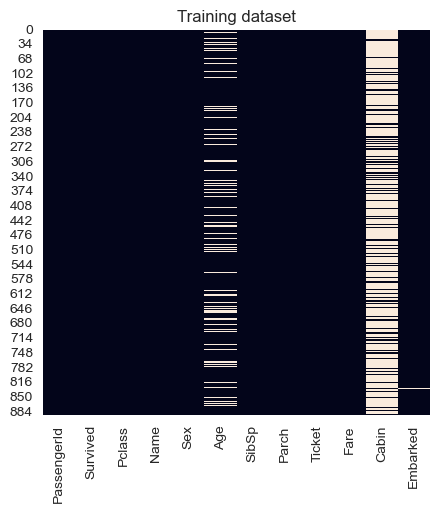

In [8]:
test.info()
plot_missing_data(train, 'Training dataset')

# Question 1: How many passengers survived?

In [9]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [10]:
train['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [11]:
def bar_chart_stacked(dataset, feature, stacked=True):
    survived = dataset[dataset['Survived'] == 1][feature].value_counts()
    dead = dataset[dataset['Survived'] == 0][feature].value_counts()
    survived_dead = pd.DataFrame([survived, dead])
    survived_dead.index = ['Passengers survived', 'Passengers died']
    ax = survived_dead.plot(kind='bar', stacked=stacked, figsize=(5,5))

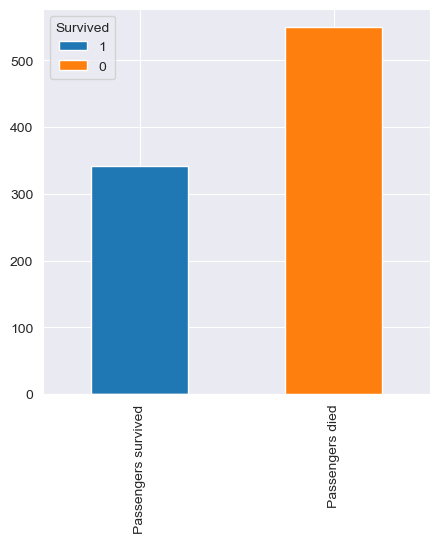

In [12]:
bar_chart_stacked(train, 'Survived')

**Datasets imbalance classification:**

[Dataset imbalance classification](Datasets_imbalance_classification.png)


# Question 2: Is the likelihood of survival dependent on gender?

In [13]:
train['Sex'].value_counts().to_frame()

,count
Sex,
male,577
female,314


In [14]:
train.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

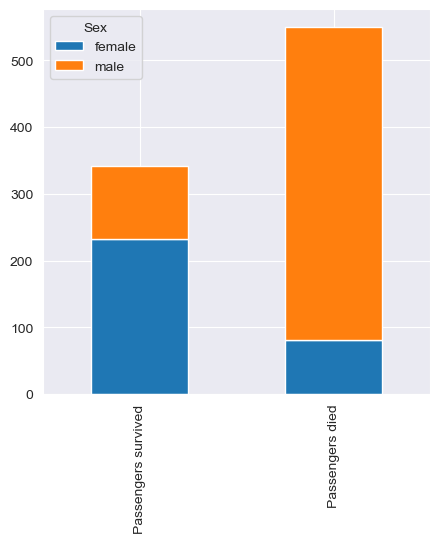

In [15]:
bar_chart_stacked(train, 'Sex')

# Question 3: Could it be that the class to which a passenger belonged correlates with the probability of survival??

In [16]:
pd.pivot_table(train, index='Survived', columns='Pclass', values='Ticket', aggfunc='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [17]:
train.groupby(['Pclass']).Survived.mean().to_frame()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


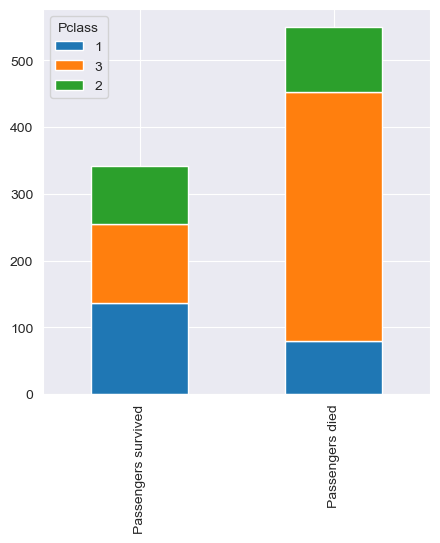

In [18]:
bar_chart_stacked(train, 'Pclass')

# Question 4: Is the higher survival rate in Class 1 due to the class itself or due to a skewed gender distribution in which female passengers dominate?

In [50]:
def bar_chart_compare(dataset, feature1, feature2=None):
    plt.figure(figsize=(5,5))
    plt.title('Survival rate by sex and class')
    g = sns.barplot(x=feature1, y='Survived', hue=feature2, errorbar=None, data=dataset).set_ylabel('Survival rate')

SyntaxError: parameter without a default follows parameter with a default (736494236.py, line 1)

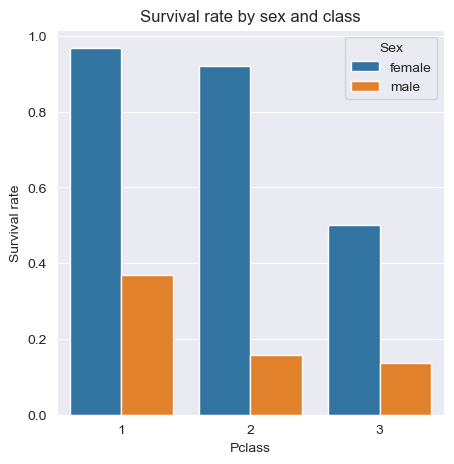

In [20]:
bar_chart_compare(train, 'Pclass', 'Sex')

In [21]:
train.groupby(['Pclass', 'Sex']).Survived.mean().to_frame()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

# Question 5: Did a passengers age influence the chance of survival?

In [22]:
def plot_distribution(dataset, feature, title, bins=30, hist=True, fsize=(5,5)):
    fig, ax = plt.subplots(figsize=fsize)
    ax.set_title(title)
    sns.distplot(dataset[feature], color='g', bins=bins, ax=ax)

In [23]:
def plot_kernet_density_estimate_survivor(dataset, feature1, title, fsize=(5,5)):
    if feature1 not in dataset.columns:
        raise KeyError(f"La colonne '{feature1}' est absente du DataFrame.")
    if 'Survived' not in dataset.columns:
        raise KeyError("La colonne 'Survived' est absente du DataFrame.")

    # Nettoyage
    data = dataset[[feature1, 'Survived']].copy()
    data[feature1] = pd.to_numeric(data[feature1], errors='coerce')
    data = data.dropna(subset=[feature1, 'Survived'])

    survived_mask = data['Survived'] == 1
    died_mask = data['Survived'] == 0

    fig, ax = plt.subplots(figsize=fsize)
    ax.set_title(title)

    sns.kdeplot(data.loc[survived_mask, feature1], fill=True, ax=ax, label='Survived')
    sns.kdeplot(data.loc[died_mask, feature1], fill=True, ax=ax, label='Died')

    ax.set_xlabel(feature1)
    ax.legend()


C:\Users\carlo\AppData\Local\Temp\ipykernel_38372\1059198365.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[feature], color='g', bins=bins, ax=ax)


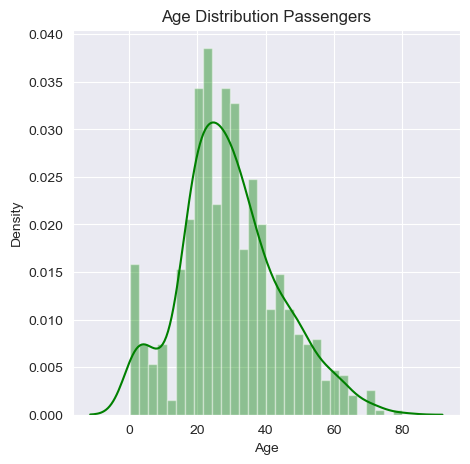

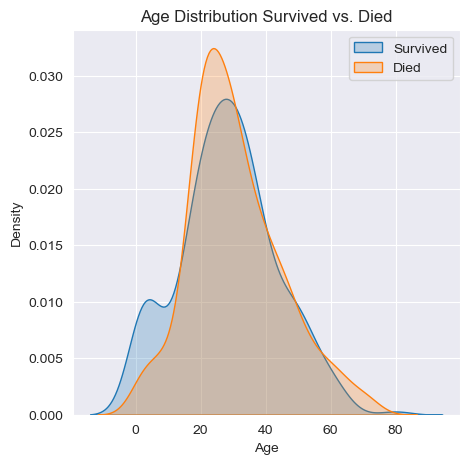

In [24]:
plot_distribution(train, 'Age', 'Age Distribution Passengers')
plot_kernet_density_estimate_survivor(train, 'Age', 'Age Distribution Survived vs. Died')


In [25]:
def plot_swarm_survivors(dataset, feature1, feature2, title):
    fig, ax = plt.subplots(figsize=(18,5))
    ax.grid(True)
    plt.xticks(list(range(0, 100, 2)))
    sns.swarmplot(y=feature1, x=feature2, hue='Survived', data=dataset).set_title(title)

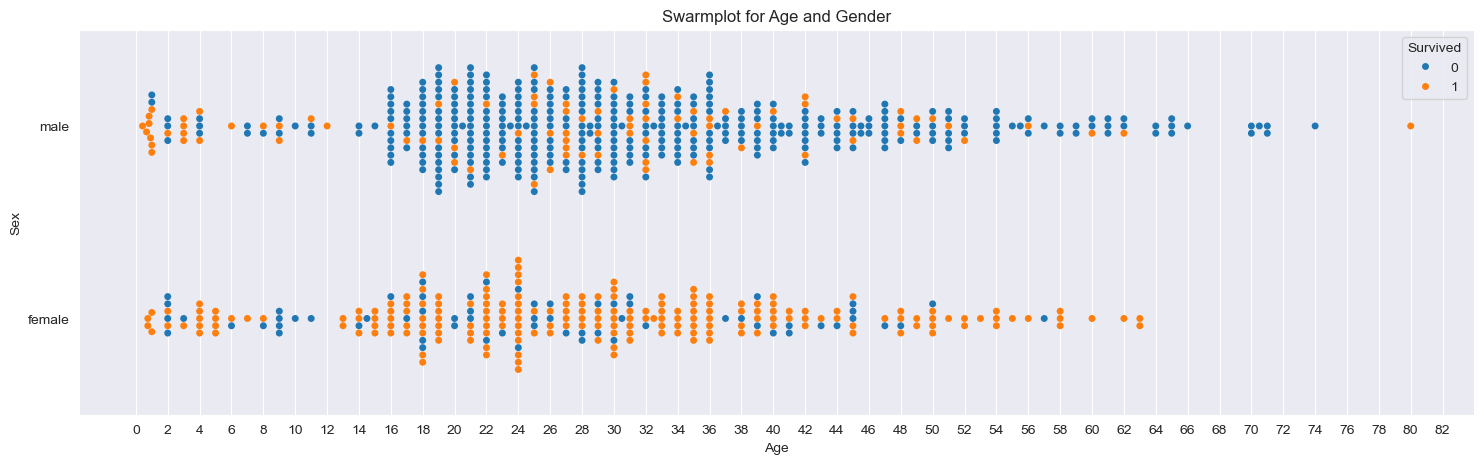

In [26]:
plot_swarm_survivors(train, 'Sex', 'Age', 'Swarmplot for Age and Gender')

C:\Users\carlo\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 55.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\carlo\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 56.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\carlo\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 76.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


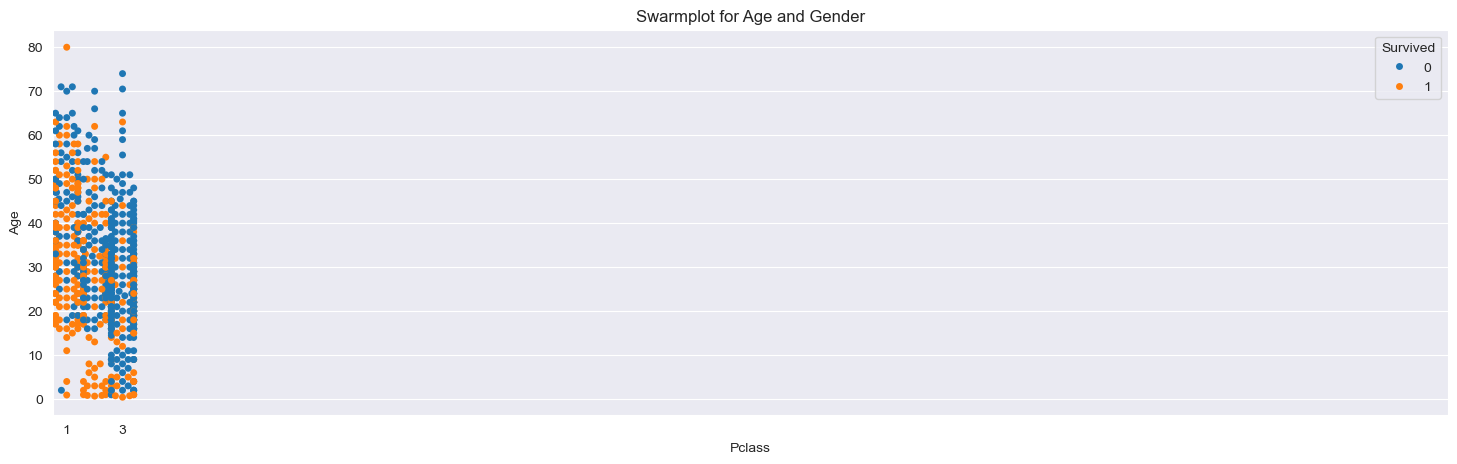

In [27]:
plot_swarm_survivors(train, 'Age', 'Pclass', 'Swarmplot for Age and Gender')

# Did paying the ticket price influence the chance of survival?

In [28]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

C:\Users\carlo\AppData\Local\Temp\ipykernel_38372\1059198365.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[feature], color='g', bins=bins, ax=ax)


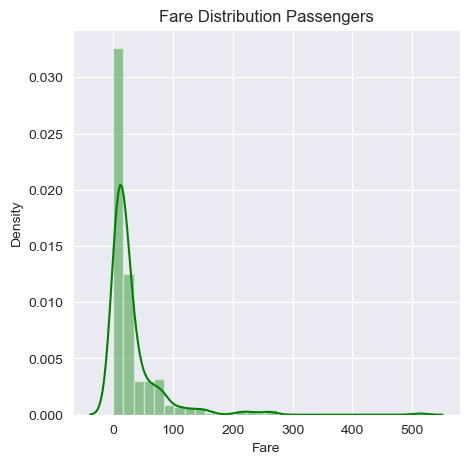

In [29]:
plot_distribution(train, 'Fare', 'Fare Distribution Passengers')

In [30]:
def plot_quartiles(dataset, feature, title, categories):
    fig, axarr = plt.subplots(figsize=(5,5))
    fare_ranges = pd.qcut(dataset[feature], len(categories), labels=categories)
    axarr.set_title(title)
    sns.barplot(x=fare_ranges, y=dataset.Survived, errorbar=None, ax=axarr).set_ylabel('Survival rate')


C:\Users\carlo\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 38.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\carlo\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\carlo\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 51.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\carlo\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


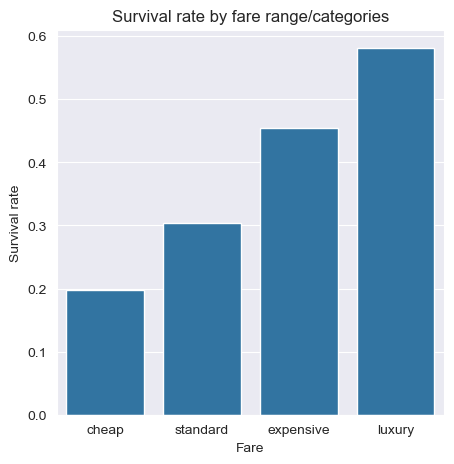

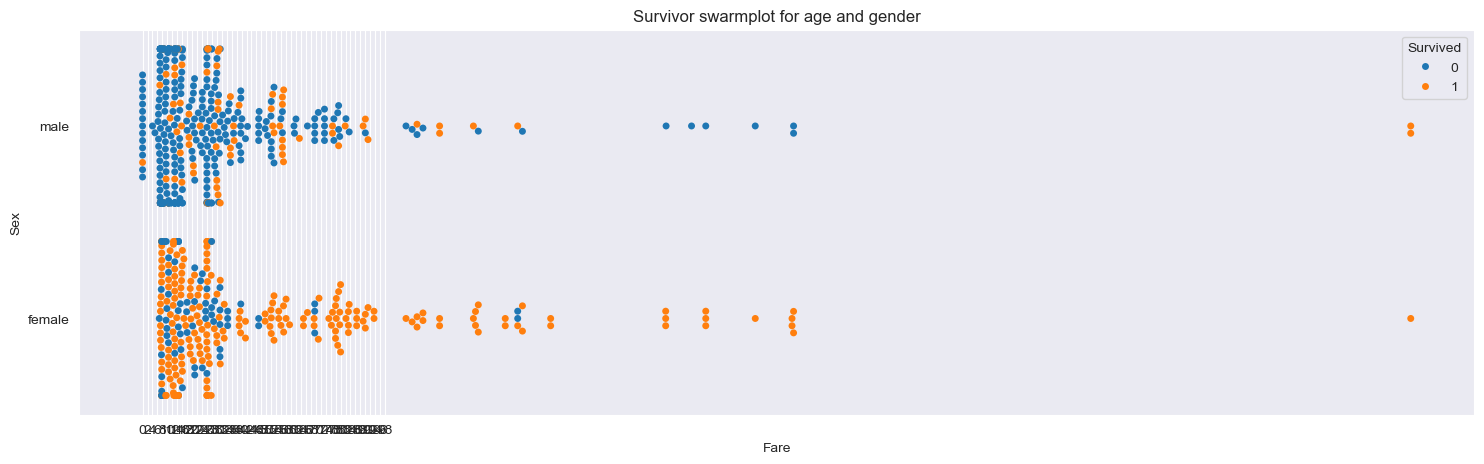

In [31]:
categories = ['cheap', 'standard', 'expensive', 'luxury']
plot_quartiles(train, 'Fare', 'Survival rate by fare range/categories', categories)
plot_swarm_survivors(train, 'Sex', 'Fare', 'Survivor swarmplot for age and gender')

In [32]:
# Who traveled for free
train.loc[train.Fare == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [33]:
# Replace Fare == 0 with NaN
train.loc[train.Fare == 0, 'Fare'] = np.NaN
test.loc[test.Fare == 0, 'Fare'] = np.NaN

# Could the place of embarkation influence the chance of survival?

In [34]:
def show_countplot(dataset, feature, title, fsize=(5,5)):
    fig, ax = plt.subplots(figsize=fsize)
    sns.countplot(dataset[feature], ax=ax).set_title(title)

def show_compare_countplot(dataset, feature1, feature2, title):
    fig, ax = plt.subplots(figsize=(5,5))
    p = sns.countplot(x=feature1, hue=feature2, data=dataset, ax=ax).set_title(title)

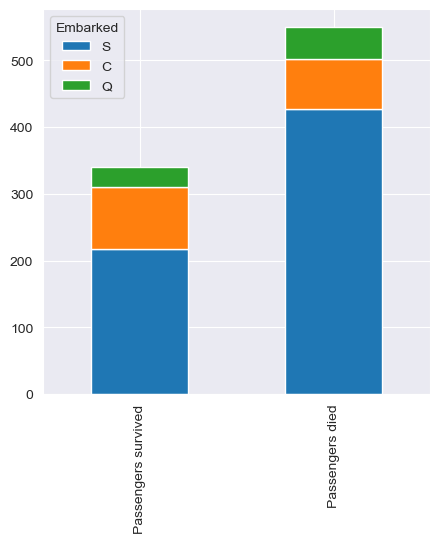

In [35]:
bar_chart_stacked(train, 'Embarked')

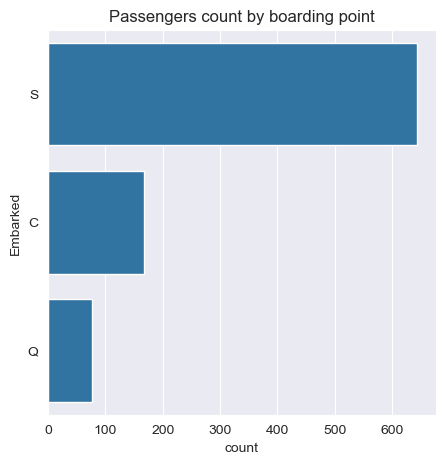

In [36]:
show_countplot(train, 'Embarked', 'Passengers count by boarding point')

In [38]:
train.Embarked.value_counts().to_frame()

,count
Embarked,
S,644
C,168
Q,77


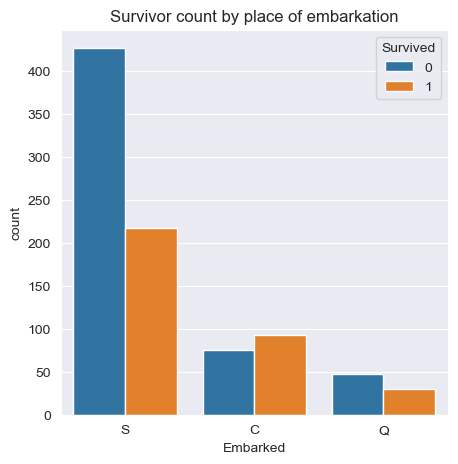

In [39]:
show_compare_countplot(train, 'Embarked', 'Survived', 'Survivor count by place of embarkation')

In [40]:
pd.pivot_table(train, index='Survived', columns='Embarked', values='Ticket', aggfunc='count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


# Was the high number of survivors that embarked at Cherbourg due to a high number of 1. Class passengers?

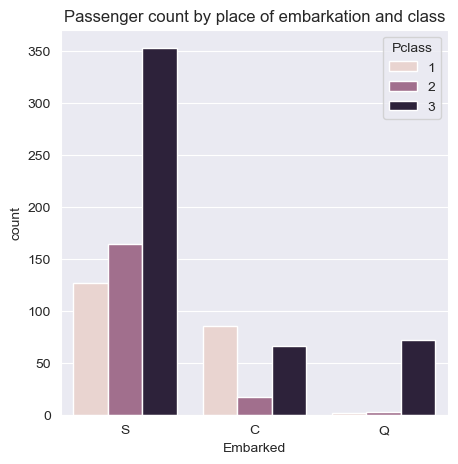

In [41]:
show_compare_countplot(train, 'Embarked', 'Pclass', 'Passenger count by place of embarkation and class')

In [44]:
train.groupby(['Embarked', 'Pclass']).Survived.sum().to_frame()

Survived
Embarked Pclass          
C        1             59
         2              9
         3             25
Q        1              1
         2              2
         3             27
S        1             74
         2             76
         3             67

# Is gender distribution responsible for the slightly higher passenger survival rate in Queenstown compared to Southampton?

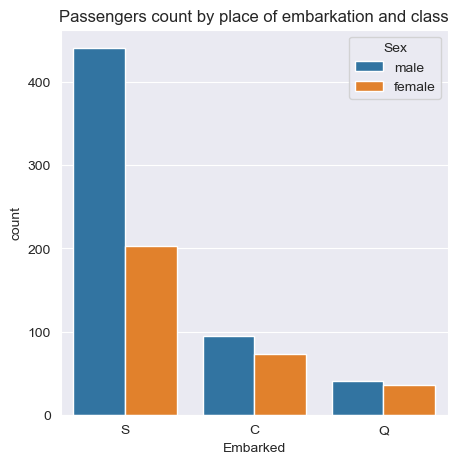

In [45]:
show_compare_countplot(train, 'Embarked', 'Sex', 'Passengers count by place of embarkation and class')

# Does the number of children/siblings/spouses or parents on board influence the chance of survival?

Chart title not relevant!


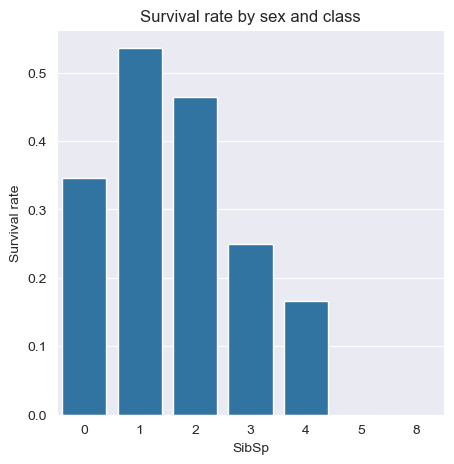

In [53]:
print('Chart title not relevant!')
bar_chart_compare(train, 'SibSp'
                  )

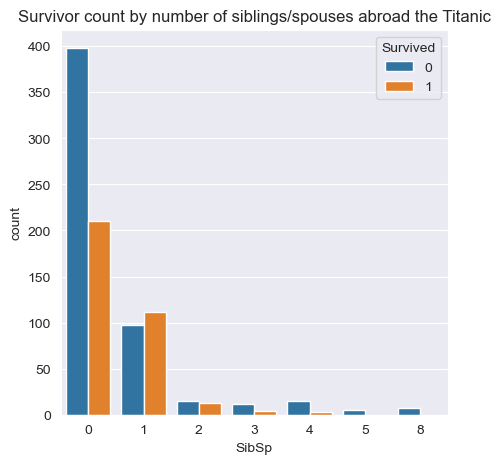

In [54]:
show_compare_countplot(train, 'SibSp', 'Survived', 'Survivor count by number of siblings/spouses abroad the Titanic')

## Parch

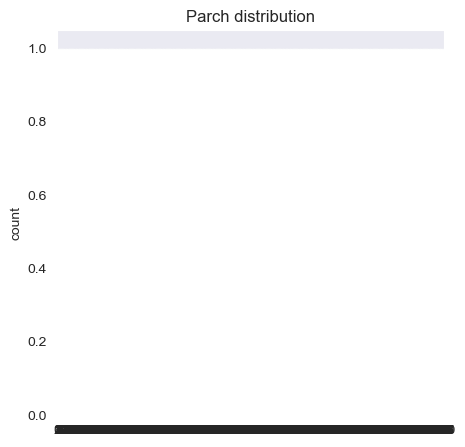

In [56]:
show_countplot(train, 'Parch', 'Parch distribution')

Title not relevant!


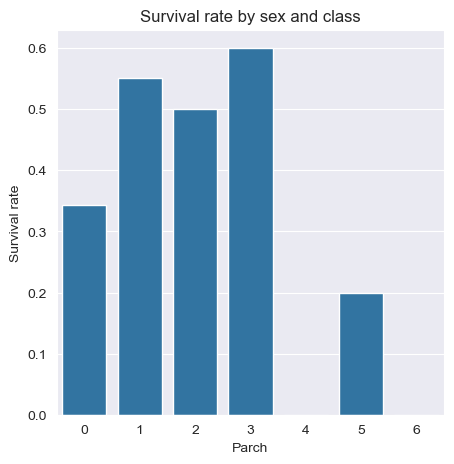

In [60]:
print('Title not relevant!')
bar_chart_compare(train, 'Parch')

# Feature engineering

In [62]:
pd.unique(train['Name'])

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [61]:
# Passengers title can have an influence in the survival rate and this title in embedded into the name. So, we extract it and put it in a new column
train['Title'] = train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test['Title'] = test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

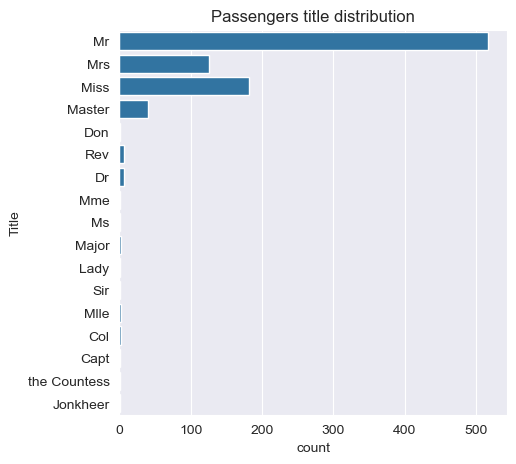

In [63]:
show_countplot(train, 'Title', 'Passengers title distribution')

In [73]:
# Replace male titles with Mr and female titles with Mrs
male_titles = ['Don', 'Major', 'Sir', 'Col', 'Capt', 'Jonkheer']
female_titles = ['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess']

train.loc[train['Title'].isin(male_titles), 'Title'] = 'Mr'
train.loc[train['Title'].isin(female_titles), 'Title'] = 'Mrs'

test.loc[train['Title'].isin(male_titles), 'Title'] = 'Mr'
test.loc[train['Title'].isin(female_titles), 'Title'] = 'Mrs'


Title not relevant!


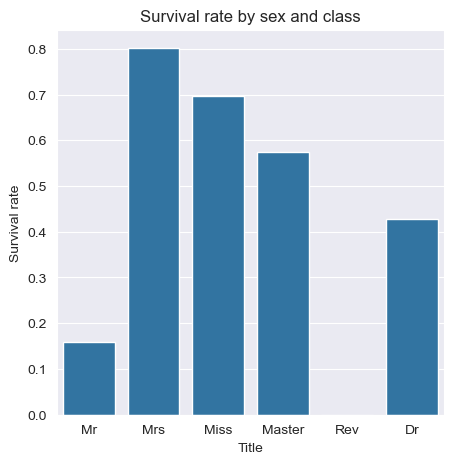

In [77]:
print('Title not relevant!')
bar_chart_compare(train, 'Title')

In [75]:
# Extracting features the cabin and ticket

# Extract the leading letters
train['Ticket_2letter'] = train.Ticket.apply(lambda x: x[:2])
test['Ticket_2letter'] = test.Ticket.apply(lambda x: x[:2])

# Extract the ticket length
train['Ticket_len'] = train.Ticket.apply(lambda x: len(x))
test['Ticket_len'] = test.Ticket.apply(lambda x: len(x))

# Extract number of cabins
train['Cabin_num'] = train.Ticket.apply(lambda x: len(x.split()))
test['Cabin_num'] = test.Ticket.apply(lambda x: len(x.split()))

# Extract leading letter
train['Cabin_1letter'] = train.Ticket.apply(lambda x: x[:1])
test['Cabin_1letter'] = test.Ticket.apply(lambda x: x[:1])

In [76]:
# Combining SibSp and Parch into one single feature
train['Fam_size'] = train['SibSp'] + train['Parch'] + 1
test['Fam_size'] = test['SibSp'] + test['Parch'] + 1

Title not relevant!


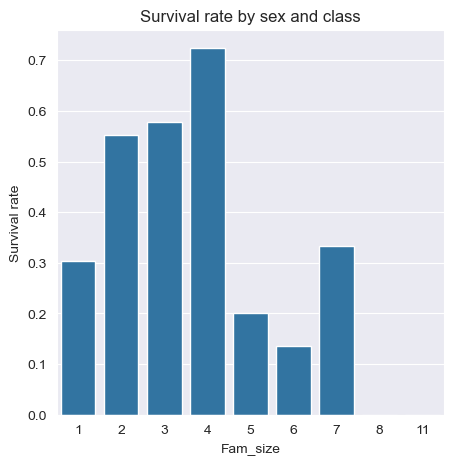

In [78]:
print('Title not relevant!')
bar_chart_compare(train, 'Fam_size')

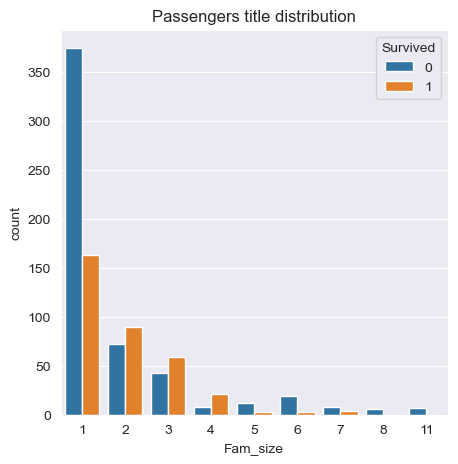

In [80]:
show_compare_countplot(train, 'Fam_size', 'Survived', 'Passengers title distribution')

In [84]:
# Feature family type
train['Fam_type'] = pd.cut(train.Fam_size, [0, 1, 4, 7, 11], labels=['solo', 'small', 'big', 'very big'])
test['Fam_type'] = pd.cut(test.Fam_size, [0, 1, 4, 7, 11], labels=['solo', 'small', 'big', 'very big'])

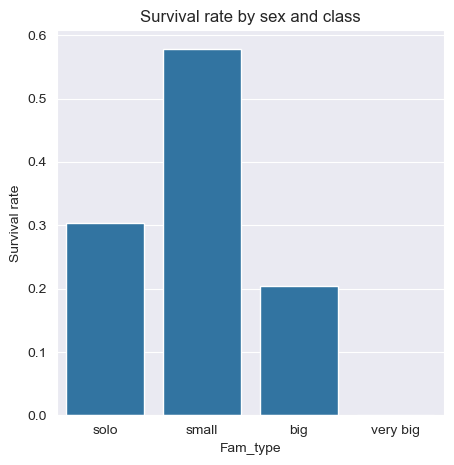

In [86]:
bar_chart_compare(train, 'Fam_type')

# Training a classifier

In [87]:
y = train['Survived']
features = ['Pclass', 'Fare', 'Title', 'Embarked', 'Fam_type', 'Ticket_len', 'Ticket_2letter']
X = train[features]
X.head()

,Pclass,Fare,Title,Embarked,Fam_type,Ticket_len,Ticket_2letter
0,3,7.2500,Mr,S,small,9,A/
1,1,71.2833,Mrs,C,small,8,PC
2,3,7.9250,Miss,S,solo,16,ST
3,1,53.1000,Mrs,S,small,6,11
4,3,8.0500,Mr,S,solo,6,37


## 🌟Prepare a data pipeline to apply features processing to both, train and test datasets

In [92]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

numerical_cols = ['Fare']
categorical_cols = ['Pclass', 'Title', 'Embarked', 'Fam_type', 'Ticket_len', 'Ticket_2letter']

# Imputing missing value with the median value
numerical_transformer = SimpleImputer(strategy='median')

# Imputing missing value with most frequent value for categorical values
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Bundle preprocessing and modeling code
titanic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=0, n_estimators=500, max_depth=5))
])

# Training
titanic_pipeline.fit(X, y)

print('Cross validation score: {:.3f}'.format(cross_val_score(titanic_pipeline, X, y, cv=10).mean()))

Cross validation score: 0.828


# Create upload file for kaggle competition

In [93]:
X_test = test[features]
X_test.head()

,Pclass,Fare,Title,Embarked,Fam_type,Ticket_len,Ticket_2letter
0,3,7.8292,Mr,Q,solo,6,33
1,3,7.0000,Mrs,S,small,6,36
2,2,9.6875,Mr,Q,solo,6,24
3,3,8.6625,Mr,S,solo,6,31
4,3,12.2875,Mrs,S,small,7,31


# Prepare the submission file

In [96]:
# Making predictions on the test set
predictions = titanic_pipeline.predict(X_test)
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
submission_file = os.path.join(DIR_SUBMISSIONS, 'my_submission_final.csv')
output.to_csv(submission_file, index=False)
print('Yours submission was successfully saved!')

Yours submission was successfully saved!
